In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
df = pd.read_csv("housing-prices-35.csv")

In [21]:
df2 = df

df2 = df2.drop_duplicates()

df2.duplicated().sum()

0

In [22]:
df_ml = df2.drop(['position_wgs', 'shape_wgs'], axis=1)
df_ml = df_ml.sort_values('date')
df_ml['date_encoded'] = range(len(df_ml))
df_ml = df_ml.drop('date', axis=1)
df_ml

,x_lbt93,y_lbt93,category,area_living,area_land,n_rooms,price,date_encoded
141056,333015.552984,6.849951e+06,C,50.0,0.0,3,50000.0,0
137601,352354.421894,6.789937e+06,C,129.0,0.0,6,357000.0,1
143302,336586.021063,6.769103e+06,H,105.0,1179.0,6,75000.0,2
137102,351025.588872,6.789804e+06,C,66.0,0.0,4,81000.0,3
146598,390216.714009,6.828844e+06,H,32.0,200.0,2,20000.0,4
...,...,...,...,...,...,...,...,...
3823,354187.151151,6.787422e+06,C,55.0,0.0,3,130000.0,96743
5794,389592.212589,6.813552e+06,H,56.0,193.0,3,100000.0,96744
24309,381025.001023,6.803979e+06,H,136.0,1455.0,5,40500.0,96745
3386,328001.580575,6.761936e+06,H,133.0,2229.0,4,188000.0,96746


In [23]:
label_encoder = LabelEncoder()
df_ml['category_encoded'] = label_encoder.fit_transform(df_ml['category'])
df_ml

,x_lbt93,y_lbt93,category,area_living,area_land,n_rooms,price,date_encoded,category_encoded
141056,333015.552984,6.849951e+06,C,50.0,0.0,3,50000.0,0,0
137601,352354.421894,6.789937e+06,C,129.0,0.0,6,357000.0,1,0
143302,336586.021063,6.769103e+06,H,105.0,1179.0,6,75000.0,2,1
137102,351025.588872,6.789804e+06,C,66.0,0.0,4,81000.0,3,0
146598,390216.714009,6.828844e+06,H,32.0,200.0,2,20000.0,4,1
...,...,...,...,...,...,...,...,...,...
3823,354187.151151,6.787422e+06,C,55.0,0.0,3,130000.0,96743,0
5794,389592.212589,6.813552e+06,H,56.0,193.0,3,100000.0,96744,1
24309,381025.001023,6.803979e+06,H,136.0,1455.0,5,40500.0,96745,1
3386,328001.580575,6.761936e+06,H,133.0,2229.0,4,188000.0,96746,1


In [24]:
df_ml = df_ml.drop('category', axis=1)

column_to_normalise = ['x_lbt93', 'y_lbt93', 'area_living', 'area_land', 'n_rooms']
scaler = StandardScaler()
df_ml[column_to_normalise] = scaler.fit_transform(df_ml[column_to_normalise])

X = df_ml.drop('price', axis=1)
y = df_ml['price']
X

,x_lbt93,y_lbt93,area_living,area_land,n_rooms,date_encoded,category_encoded
141056,-1.044704,1.954181,-0.859845,-0.162254,-0.462395,0,0
137601,0.096057,-0.343283,1.024211,-0.162254,1.394246,1,0
143302,-0.834089,-1.140871,0.451840,0.006532,1.394246,2,1
137102,0.017671,-0.348390,-0.478264,-0.162254,0.156486,3,0
146598,2.329476,1.146139,-1.289124,-0.133622,-1.081275,4,1
...,...,...,...,...,...,...,...
3823,0.204166,-0.439584,-0.740601,-0.162254,-0.462395,96743,0
5794,2.292638,0.560737,-0.716752,-0.134624,-0.462395,96744,1
24309,1.787276,0.194277,1.191153,0.046044,0.775366,96745,1
3386,-1.340468,-1.415221,1.119607,0.156849,0.156486,96746,1


In [25]:
features = df_ml[['x_lbt93','y_lbt93','area_living','area_land','n_rooms','date_encoded','category_encoded']]
target = df_ml['price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

Root Mean Squared Error: 105405.09555290533
MAE: 62463.86799364371
MSE: 11110234168.517103
R2: 0.3988599701918526


In [28]:
y_pred

array([176691.28977481, 140506.25853669, 399019.66439107, ...,
       174433.9872755 , 167174.89353428, 200204.69618133])

In [29]:
y_test

19363     118000.0
126765    133300.0
2135      660000.0
1219      156500.0
78001     185000.0
            ...   
104005    180000.0
12855      45000.0
108325    216000.0
92513      80000.0
16988     155000.0
Name: price, Length: 19350, dtype: float64

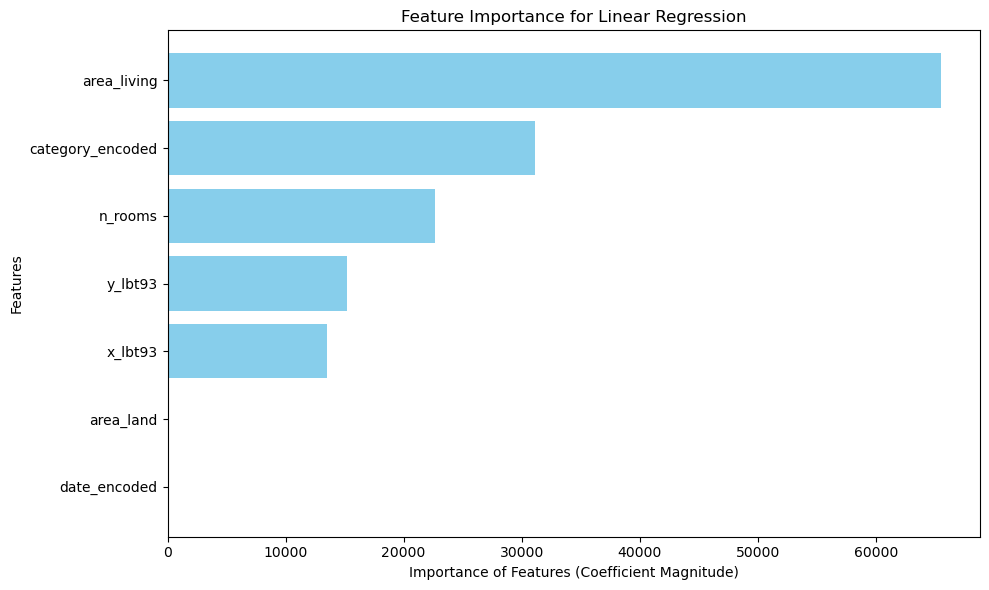

In [33]:
feature_importances = np.abs(lr.coef_)  
feature_names = np.array(X.columns)
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Importance of Features (Coefficient Magnitude)")
plt.ylabel("Features")
plt.title("Feature Importance for Linear Regression")
plt.tight_layout()
plt.show()

In [35]:
individual_rmse = np.sqrt((y_pred - y_test) ** 2)

print(individual_rmse)

19363      58691.289775
126765      7206.258537
2135      260980.335609
1219       40509.706002
78001      10850.791053
              ...      
104005      5839.377911
12855      86033.585281
108325     41566.012724
92513      87174.893534
16988      45204.696181
Name: price, Length: 19350, dtype: float64


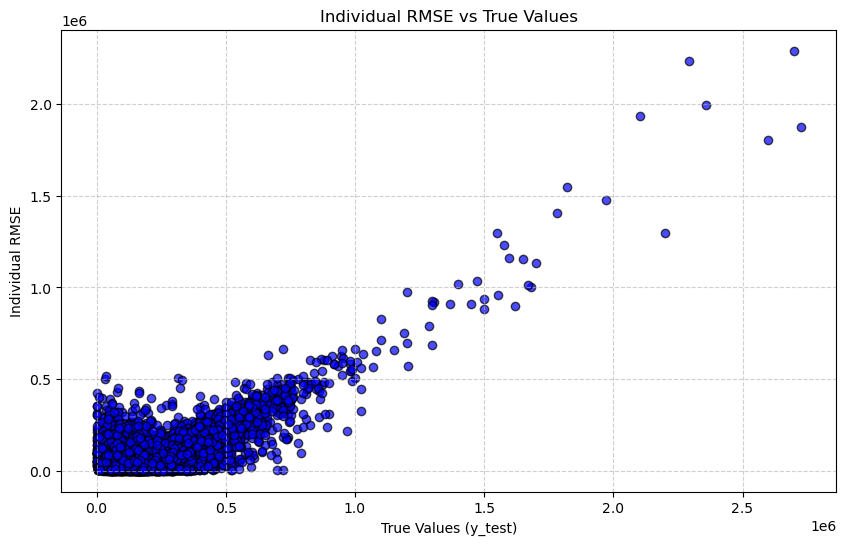

In [37]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, individual_rmse, color='blue', alpha=0.7, edgecolor='k')

# Add labels and title
plt.xlabel('True Values (y_test)')
plt.ylabel('Individual RMSE')
plt.title('Individual RMSE vs True Values')

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()